In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/daik_/.local/share/virtualenvs/_python-Xq8u6thj/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [61]:
def parser(file_path):
    table = pd.read_csv(
        file_path,
        skiprows=2,
        names=['nproc', 'total [ms]', 'resolution'],
        sep='\t',
        error_bad_lines=False
    )
    return table[table.notna().all(axis=1)]

In [36]:
file_pathes = {
    1: 'results/1core-1process.txt',
    2: 'results/1core-2process.txt',
    4: 'results/1core-4process.txt',
    8: 'results/1core-8process.txt',
}

In [62]:
tables = dict()
for i, path in file_pathes.items():
    tables[i] = parser(path)

In [119]:
def plot_table(t):
    levels = set(t['nproc'])
    artists = []
    for level in levels:
        _t = t[t['nproc'] == level]
        x = _t['total [ms]']
        y = _t['resolution']
        artist, = plt.plot(x, y, '.', ms=3)
        artists.append(artist)
        
    plt.legend(artists, ['proc: ' + str(level) for level in levels])

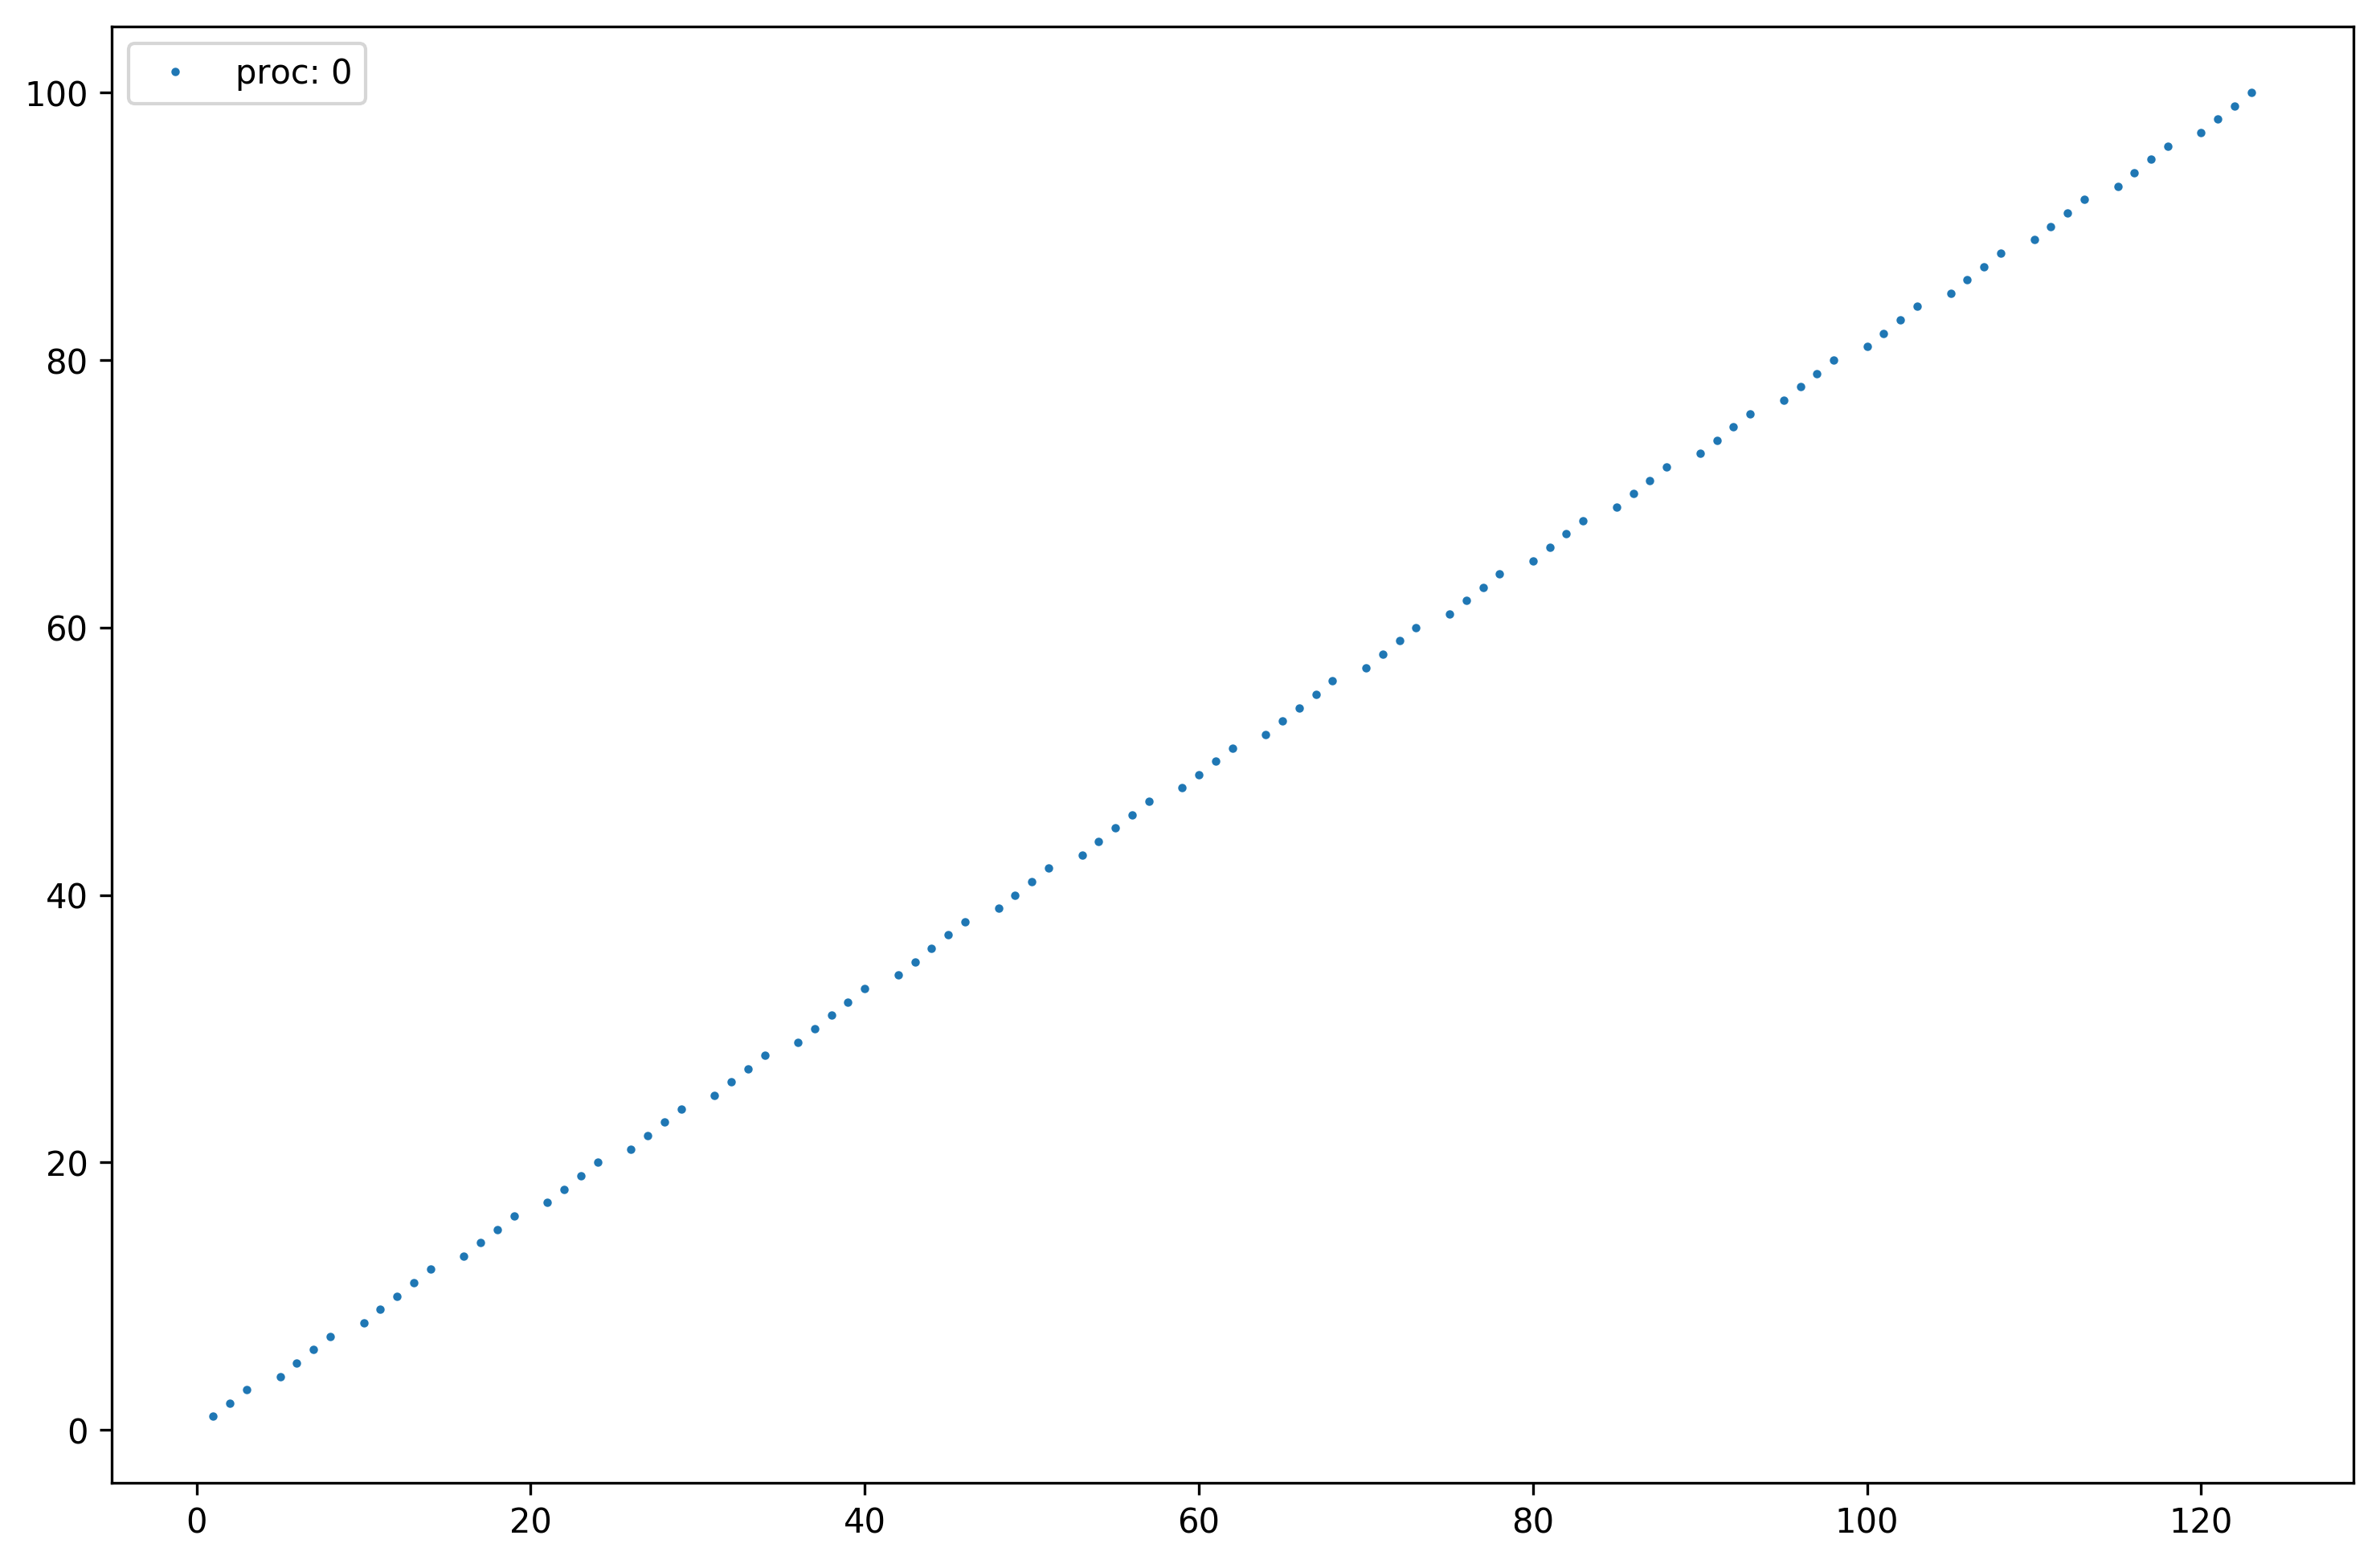

In [136]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(tables[1])

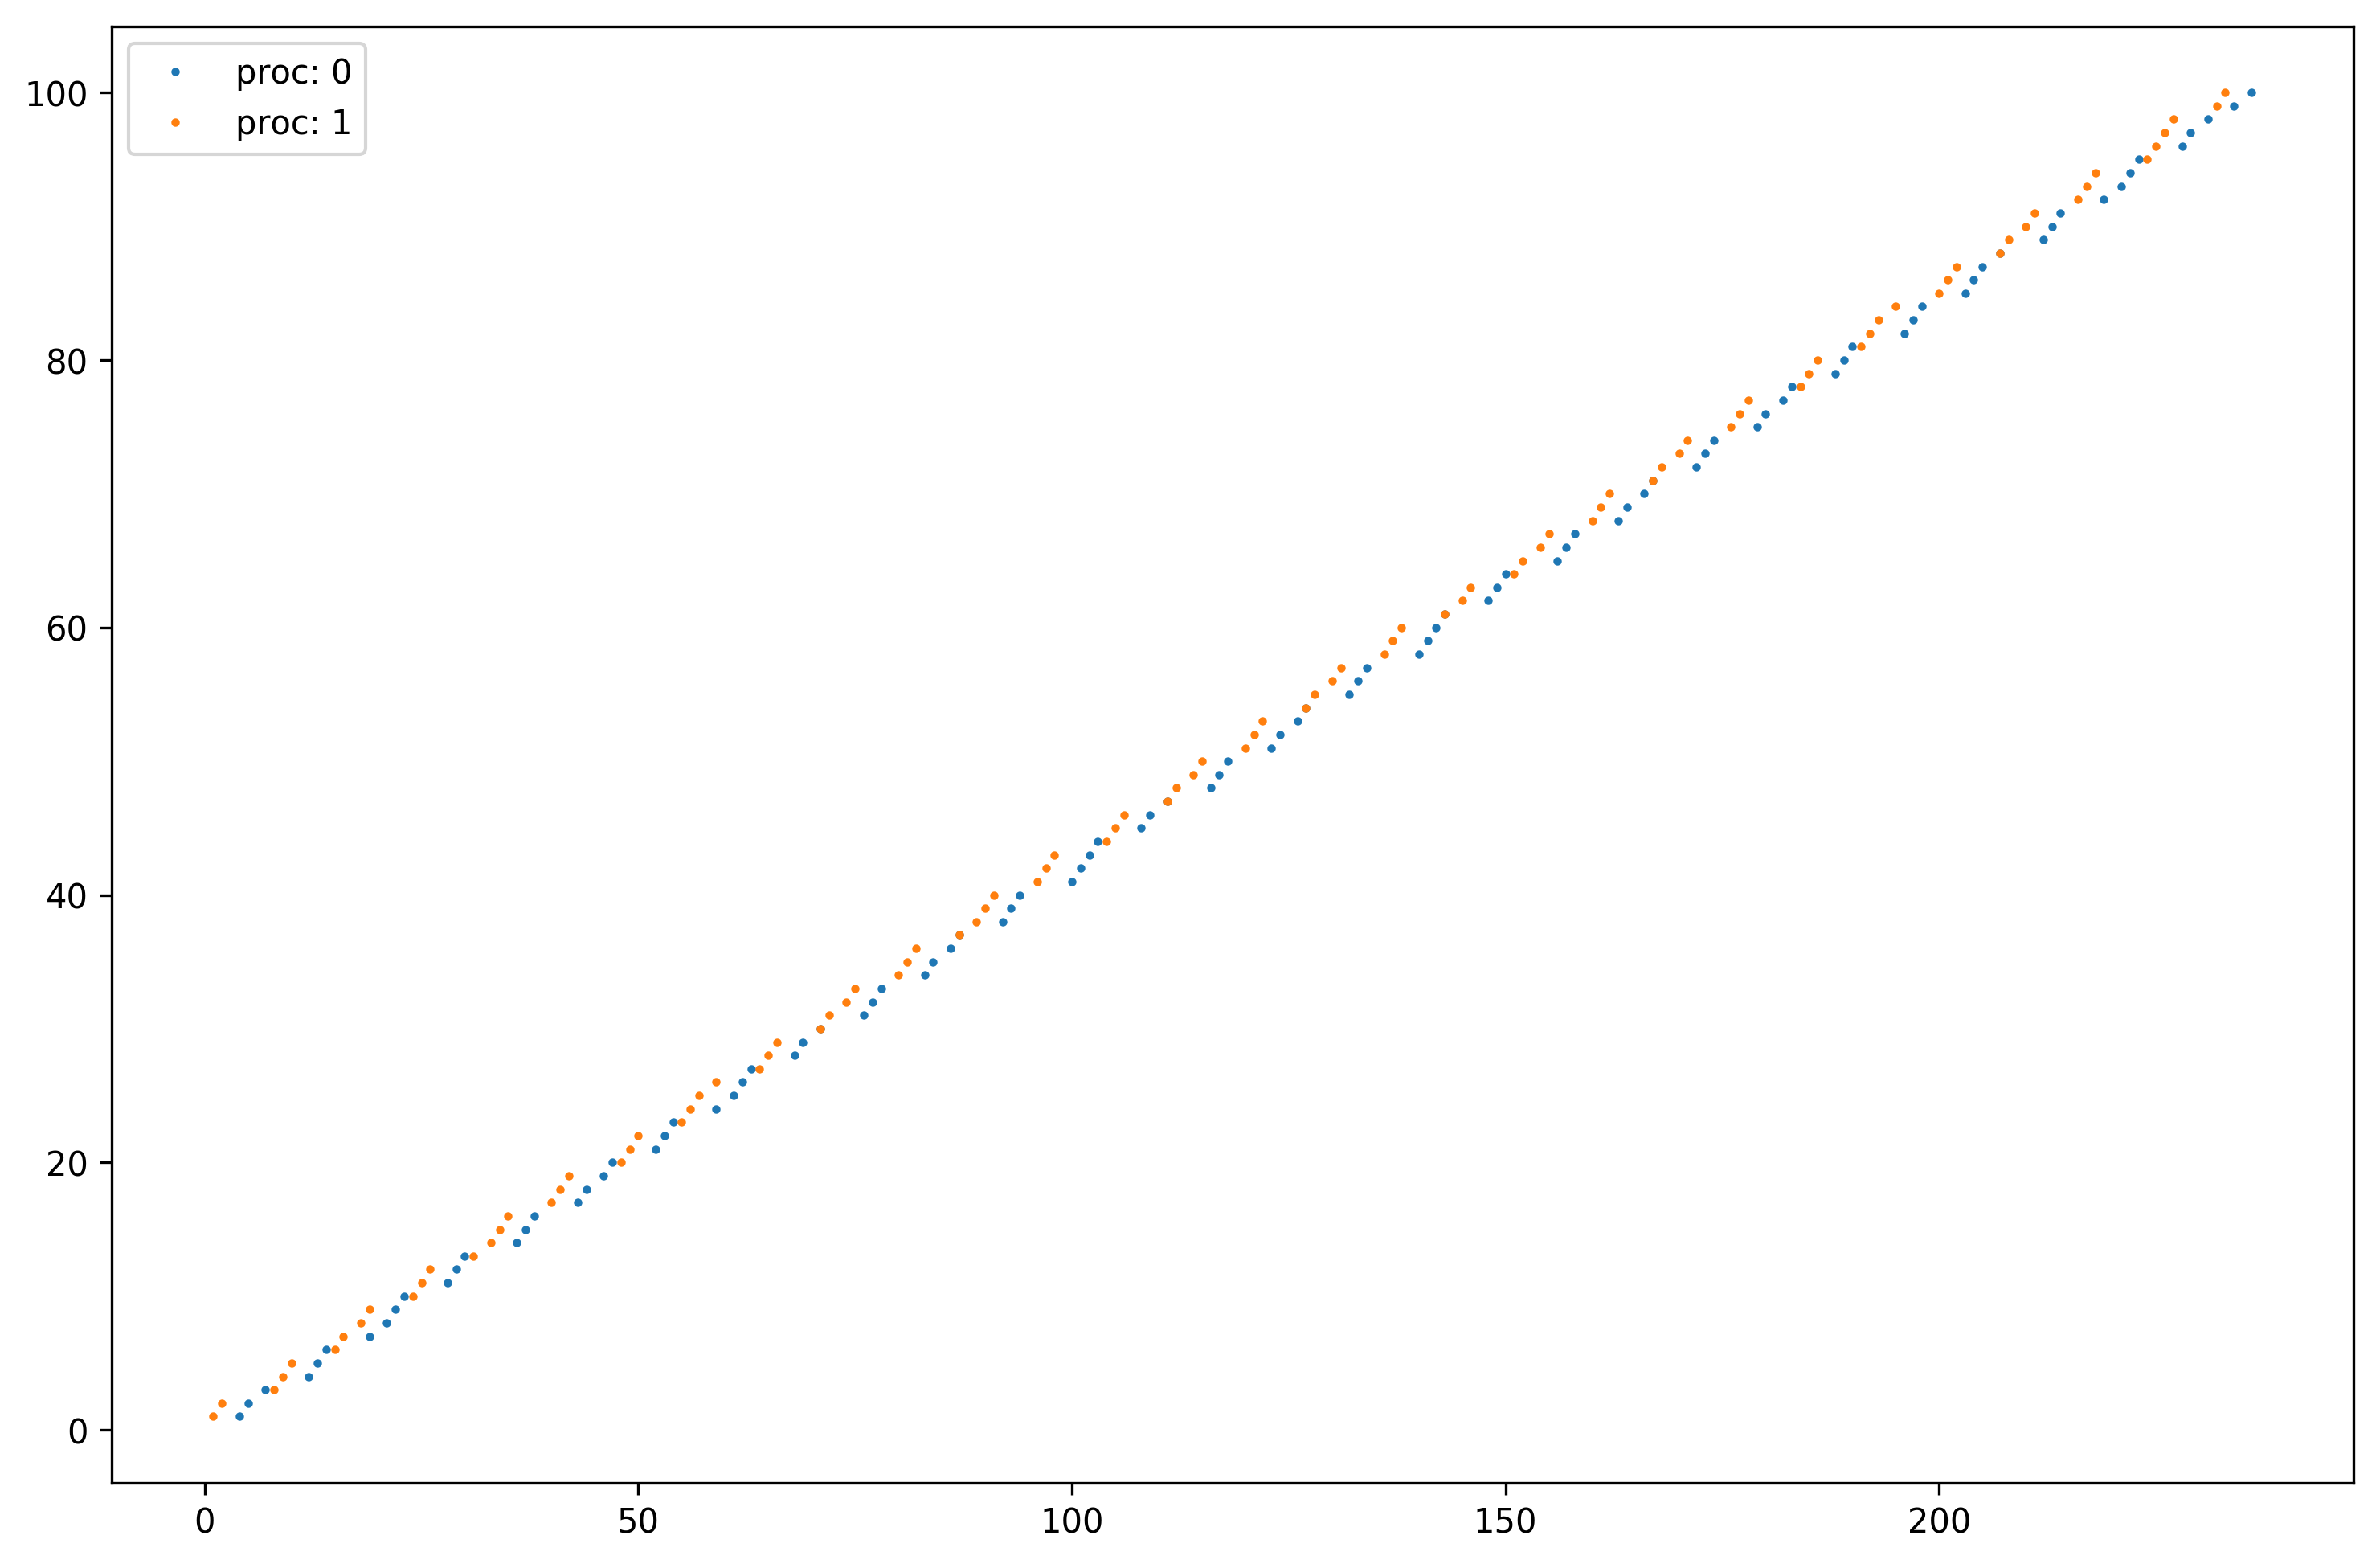

In [135]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(tables[2])

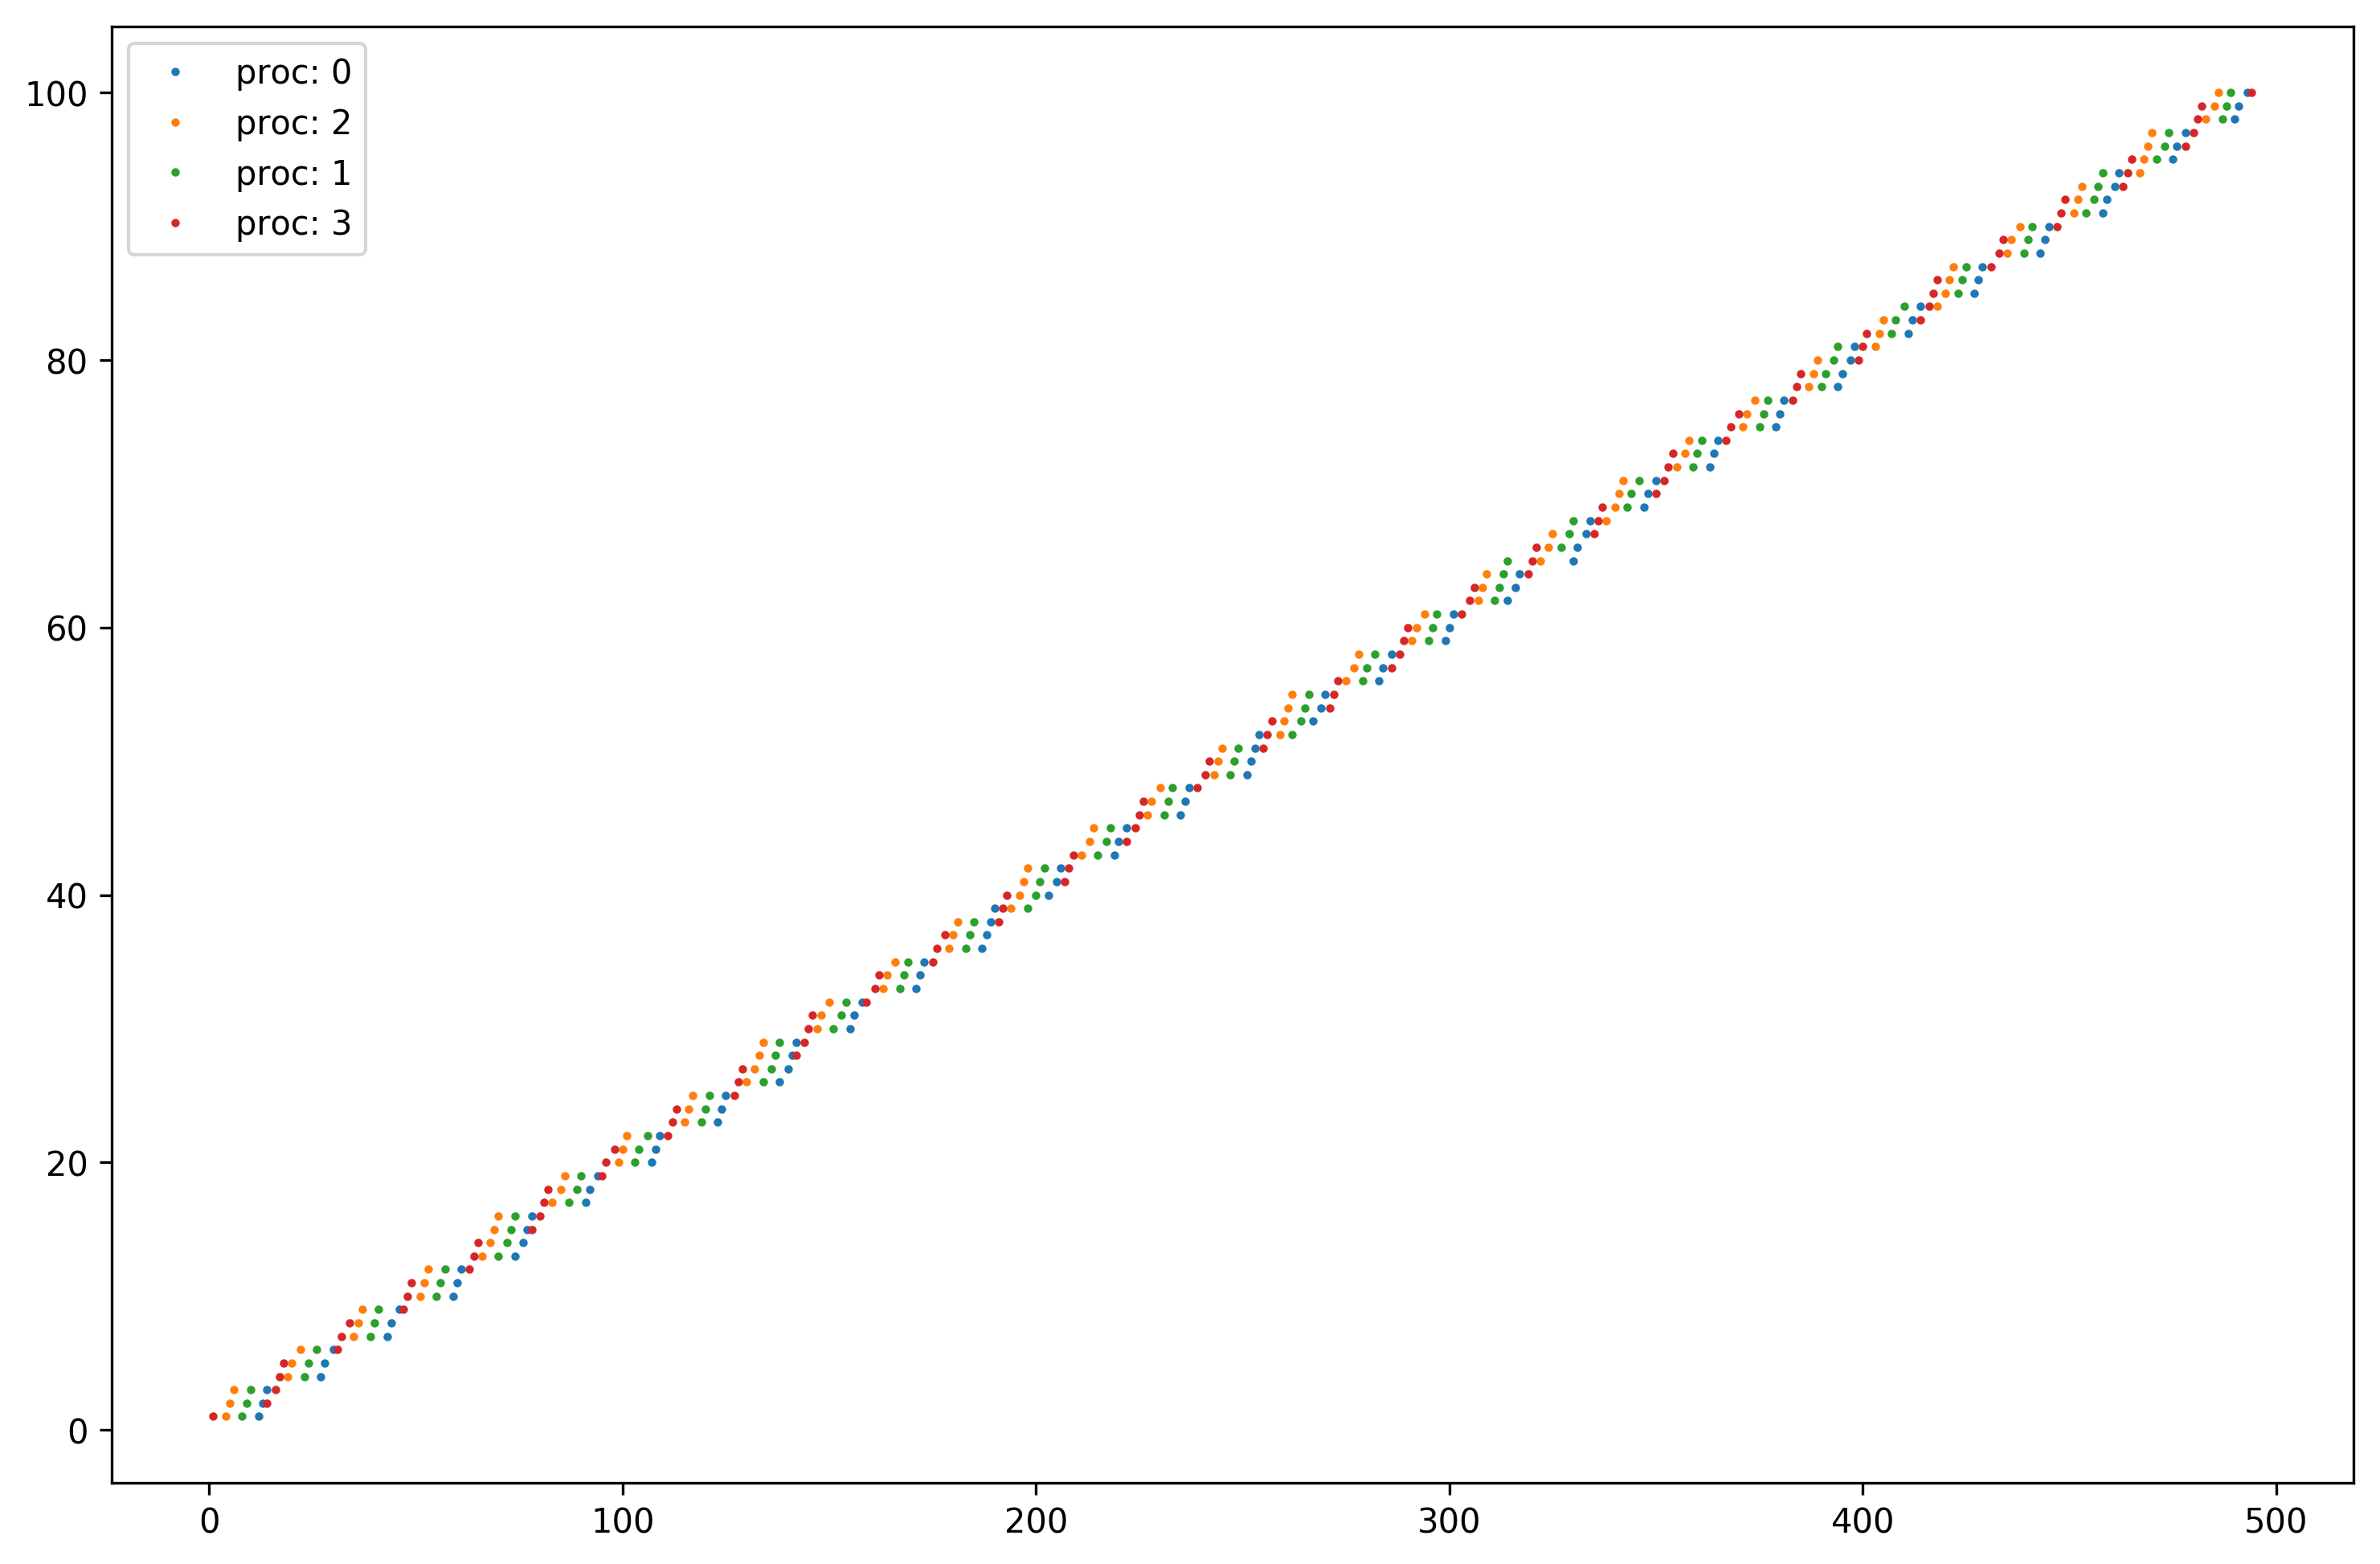

In [134]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(tables[4])

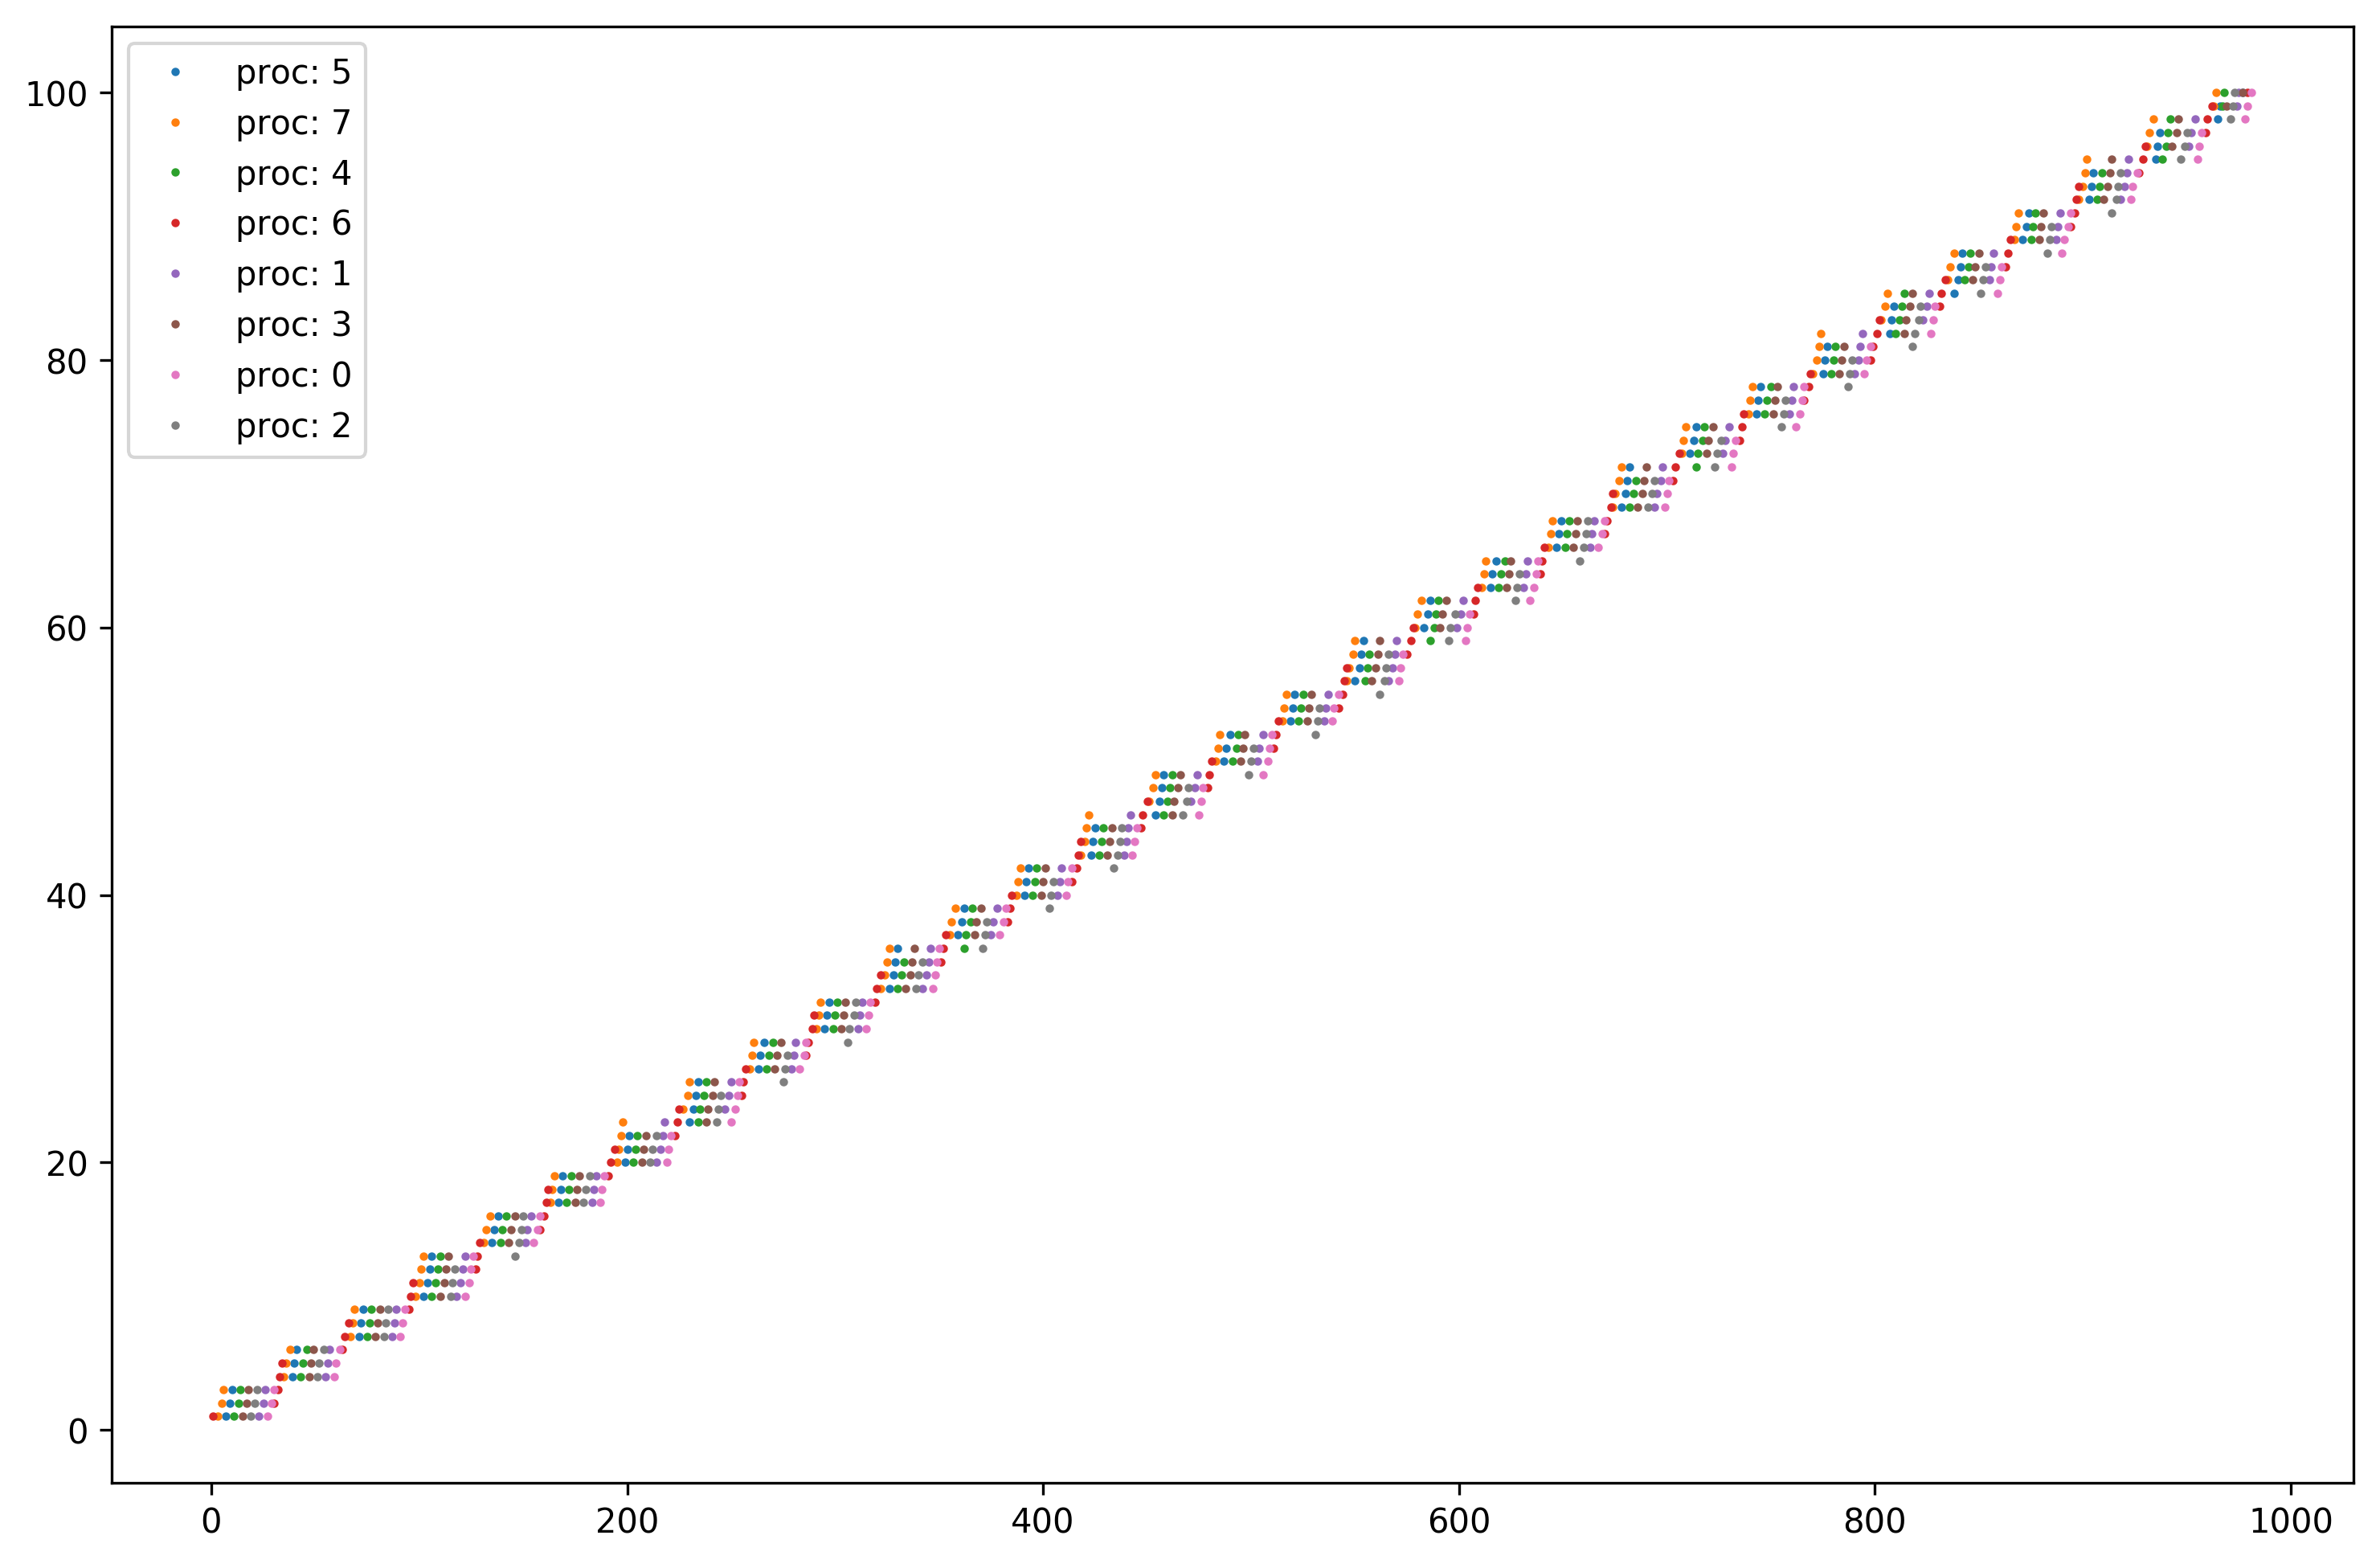

In [133]:
plt.figure(figsize=(12, 8), dpi=300)
plot_table(tables[8])